In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation


In [4]:
from google.colab import files
import io
uploaded= files.upload()

Saving Real estate valuation data set.xlsx to Real estate valuation data set.xlsx


Cargar el dataset 


In [5]:
File = pd.ExcelFile('Real estate valuation data set.xlsx')
print(File.sheet_names)
df= pd.read_excel(io.BytesIO(uploaded['Real estate valuation data set.xlsx']))
print(df)

['工作表1']
      No  X1 transaction date  ...  X6 longitude  Y house price of unit area
0      1          2012.916667  ...     121.54024                        37.9
1      2          2012.916667  ...     121.53951                        42.2
2      3          2013.583333  ...     121.54391                        47.3
3      4          2013.500000  ...     121.54391                        54.8
4      5          2012.833333  ...     121.54245                        43.1
..   ...                  ...  ...           ...                         ...
409  410          2013.000000  ...     121.50381                        15.4
410  411          2012.666667  ...     121.54310                        50.0
411  412          2013.250000  ...     121.53986                        40.6
412  413          2013.000000  ...     121.54067                        52.5
413  414          2013.500000  ...     121.54310                        63.9

[414 rows x 8 columns]


Crear Vector de entradas X y salidas Y, luego normalizar (xN, yN)


No handles with labels found to put in legend.


117.5 7.6


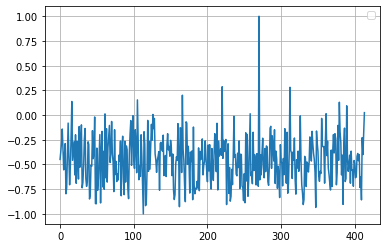

In [7]:
Y=df.iloc[:,7]
X=df.iloc[:,1:7]  

xN=np.zeros(X.shape)
for i in range(0,5):
    #Calculo del maximo y el minimo:
    x_maximo=max(X.iloc[:,i])
    x_minimo=min(X.iloc[:,i])
    
    for j in range(X.shape[0]):
        xN[j,i]=2*((X.iloc[j,i]-x_minimo)/(x_maximo-x_minimo))-1

yN=np.zeros(Y.shape)
y_maximo=max(Y)
y_minimo=min(Y)

for i in range(Y.shape[0]):
    yN[i]=2*((Y.iloc[i]-y_minimo)/(y_maximo-y_minimo))-1

print (y_maximo, y_minimo)
#print (y_trainN)
plt.plot(yN)
plt.legend()
plt.grid()
plt.show()

Partir el dataseet en datos de entrenamiento y datos de validación 

In [8]:
#Splitting the dataset into the Training set and the Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xN, yN, test_size = 0.3)

print (y_test)
print (x_test)

[-0.27752502 -0.44494995 -0.33939945 -0.31756142 -0.85805278 -0.46678799
 -0.62147407 -0.7488626  -0.788899   -0.76524113 -0.73248408  0.2811647
 -0.13739763 -0.4722475  -0.54686078 -0.89808917 -0.10464058 -0.90536852
  0.00636943 -0.36851683 -0.4922657  -0.16469518 -0.64695177 -0.2811647
 -0.03366697 -0.70518653 -0.82165605 -0.37033667 -0.19563239 -0.31210191
 -0.38489536 -0.42311192 -0.26478617 -0.56869882 -0.42129208 -0.36851683
 -0.60145587 -0.37397634 -0.8544131  -0.70700637 -0.41765241 -0.50864422
 -0.49590537 -0.16469518 -0.55414013 -0.19745223 -0.69062784 -0.17379436
 -0.60509554 -0.53048226 -0.8343949  -0.7233849  -0.36487716 -0.60509554
 -0.08098271 -0.19927207 -0.40855323 -0.39581438 -0.14831665 -0.31574158
 -0.67060965 -0.45768881 -0.44858963 -0.40673339 -0.65423112 -0.41947225
 -0.74158326 -0.73248408 -0.25568699 -0.41583258 -0.39945405 -0.3921747
 -0.39945405 -0.39581438 -0.13375796 -0.45768881 -0.36123749 -0.22474977
 -0.61965423 -0.59599636 -0.45040946  0.09372157  0.01

Entrenar la red neuronal

In [9]:
model = Sequential()
model.add(Dense(10, input_dim=6, activation='tanh'))     #hidden layer
model.add(Dense(1, activation='linear'))                   #output layer

model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['accuracy'])
model.summary()

model.fit(x_train,y_train, epochs=5000,verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


KeyError: ignored

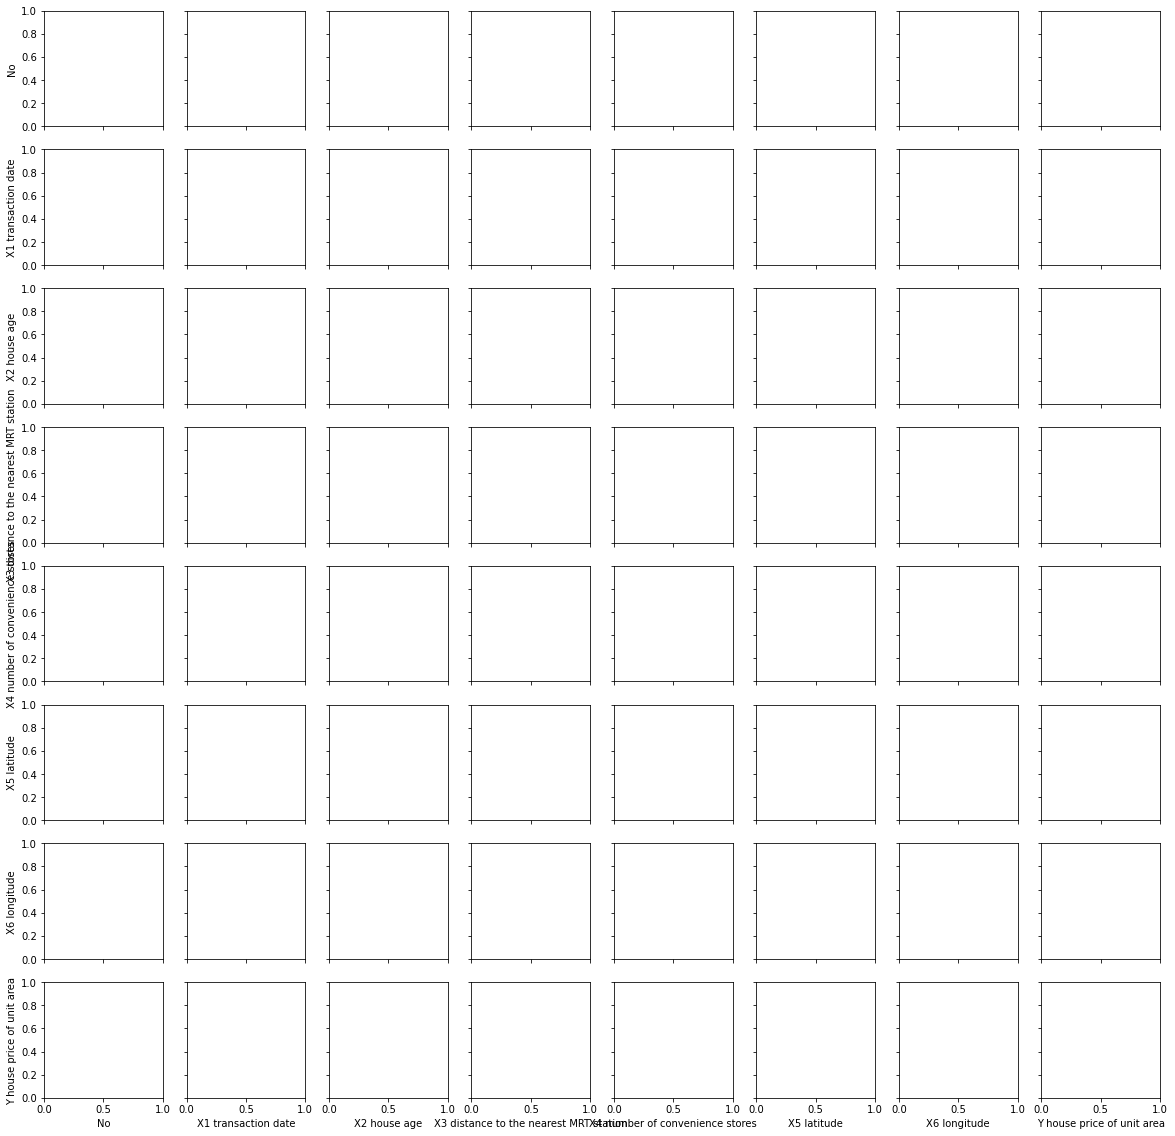

In [13]:
import seaborn

seaborn.pairplot(df,hue="longitude")
plt.show()

Usar el comando predict para ver el comportamiento de la red con los datos de entrenamiento

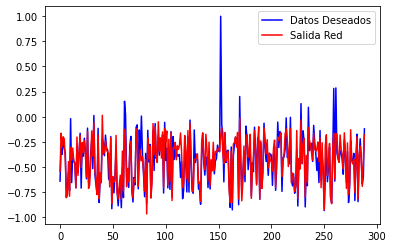

In [ ]:
outputM=model.predict(x_train)

Xg, Yg = x_train, y_train
plt.plot( Yg, 'b-', label='Datos Deseados')
plt.plot( outputM, 'r-', label='Salida Red')
plt.legend()
plt.show()

Desnormalizar la salida de entrenamiento

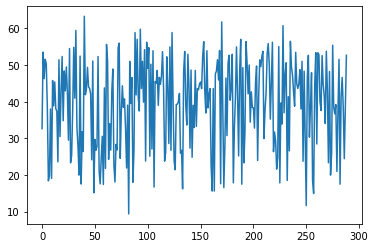

In [ ]:
RealOutput=np.zeros(y_train.shape)
y_maximo1=1
y_minimo1=-1

for i in range(y_train.shape[0]):
    RealOutput[i]=(y_maximo-y_minimo)*((outputM[i]-y_minimo1)/(y_maximo1-y_minimo1))+y_minimo

plt.plot(RealOutput)
plt.show()

Validacion de la red y desnormalizacion de la salida

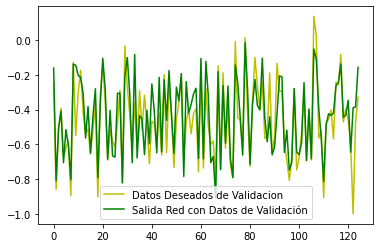

In [ ]:
outputTest=model.predict(x_test)

RealOutputTest=np.zeros(y_test.shape)
y_maximo1=1
y_minimo1=-1

for i in range(y_test.shape[0]):
    RealOutputTest[i]=(y_maximo-y_minimo)*((outputM[i]-y_minimo1)/(y_maximo1-y_minimo1))+y_minimo

Xg, Yg = x_train, y_train
plt.plot( y_test, 'y-', label='Datos Deseados de Validacion')
plt.plot( outputTest, 'g-', label='Salida Red con Datos de Validación')
plt.legend()
plt.show()

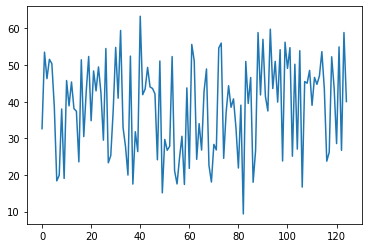

In [ ]:
plt.plot(RealOutputTest)
plt.show()

Coeficiente de regresion lineal

Coefficients: 
 [[0.82638473]]


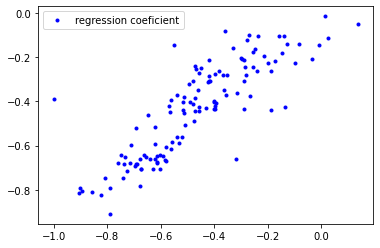

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

output=outputTest
target=y_test.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(target,output)

# Make predictions using the testing set
#y_pred = regr.predict(target)

# The coefficients
print('Coefficients: \n', regr.coef_)

Xg, Yg = target,output
plt.plot(Xg, Yg,'b.', label='regression coeficient')
plt.legend()
plt.show()

Extraccion de pesos y bias para arduino

In [ ]:
print("Hidden Weights: \n",model.layers[0].get_weights()[0])

print("Hidden Bias: \n",model.layers[0].get_weights()[1])

print("Output Weights: \n",model.layers[1].get_weights()[0])

print("Output Bias: \n",model.layers[1].get_weights()[1])

Hidden Weights: 
 [[-0.31291878 -0.7243902  -0.2717542   0.16778581 -0.341892    0.23882905
  -0.05333745 -0.06470579  0.14434066 -0.05418527]
 [-0.8798263  -0.48091146  0.06049668 -0.1775718  -0.53685    -0.03948487
  -0.26872045 -0.96781003 -0.09135639  0.2688472 ]
 [-0.24627806  0.07534973  0.29452738 -2.3024967   0.5473372   0.61830145
  -0.53753597 -0.89022475 -0.04971354  0.45063332]
 [-0.31119537 -0.05039236 -0.07894202  0.6597537  -0.24781293  0.10077607
  -1.0803094  -0.2808158  -0.8817496  -0.26042312]
 [-0.05500424  0.8734105  -0.13375407  1.0235504  -1.7919521  -1.0712372
  -1.3823599  -0.01777996  0.38212833  0.29762253]
 [-0.29710802 -0.2899439  -0.12880293 -0.10436648 -0.27247503  0.5432026
  -0.27272338 -0.1032424  -0.07673854 -0.06187183]]
Hidden Bias: 
 [-0.17238222  0.43854246  0.1179479  -0.44133905  0.31964317  0.40417835
 -0.02630026  0.15181442  0.33361837  0.16354014]
Output Weights: 
 [[ 0.8036418 ]
 [-0.26145494]
 [-0.4671461 ]
 [-0.41020644]
 [-0.674239  ]
 [